In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from sklearn.preprocessing import StandardScaler
import scipy.io
from itertools import chain


- Moments in statistics are popularly used to describe the characteristic of a distribution. Measure the location of the central point. Second moment- Standard Deviation (SD, σ(Sigma)): Measure the spread of values in the distribution OR how far from the normal

In [1]:
!pip install lmoments3

  Using cached lmoments3-1.0.4.post1-py3-none-any.whl (17 kB)
ERROR: Requested lmoments3 from https://files.pythonhosted.org/packages/b6/83/6649731d9b30b937d65dc7eee7aa017311aed58bee0628f07304bbe33d8b/lmoments3-1.0.4.post1-py3-none-any.whl#sha256=137194c637bde5c99afe943e25b8f542f871620768f662cadb17dc212113f426 has different version in metadata: '1.0.4'


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import types

from lmoments3 import distr

In [3]:
train_df = pd.read_csv('./Book4.csv',header=None)


In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1980,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1980,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1980,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1980,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1980,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,7.2


In [5]:
t2=train_df.iloc[:,0:2]

In [6]:
t1=train_df.iloc[:,2:]

In [7]:
t2.head()

,0,1
0,1980,1
1,1980,2
2,1980,3
3,1980,4
4,1980,5


In [8]:
t1=t1.sum(axis = 1, skipna = True) 

In [9]:
t1.head()

0     0.0
1     0.0
2     0.0
3     2.6
4    19.2
dtype: float64

In [10]:
final=horizontal_stack = pd.concat([t2, t1], axis=1)

In [11]:
final.head()

,0,1,0
0,1980,1,0.0
1,1980,2,0.0
2,1980,3,0.0
3,1980,4,2.6
4,1980,5,19.2


In [12]:
final.columns = ['Year','Month','Prec']

In [13]:
import pandas as pd
from scipy.io import loadmat

data_dict = loadmat('./Vijayawada_runoff.mat')
data_dict.items
data_array =list(data_dict.values())
data=np.array(data_array[3:])
data.shape
data=data.flatten()
data.shape
df=pd.DataFrame(data)

In [14]:
df.head()

,0
0,2.817102
1,4075.688328
2,3282.789179
3,1768.535872
4,266.902092


In [15]:
df.columns = ['Discharge']


In [16]:
df.head()

,Discharge
0,2.817102
1,4075.688328
2,3282.789179
3,1768.535872
4,266.902092


In [17]:
df1=pd.DataFrame(pd.date_range(start='1965-01', periods=600, freq='M'))
df1.head()

,0
0,1965-01-31
1,1965-02-28
2,1965-03-31
3,1965-04-30
4,1965-05-31


In [18]:
frames=[df1,df]
daily_discharge=pd.concat(frames,axis=1)
daily_discharge.head()
daily_discharge.columns = ['Date', 'Discharge']
daily_discharge.head()


,Date,Discharge
0,1965-01-31,2.817102
1,1965-02-28,4075.688328
2,1965-03-31,3282.789179
3,1965-04-30,1768.535872
4,1965-05-31,266.902092


In [19]:
daily_discharge.shape

(600, 2)

In [20]:
daily_discharge.head()

,Date,Discharge
0,1965-01-31,2.817102
1,1965-02-28,4075.688328
2,1965-03-31,3282.789179
3,1965-04-30,1768.535872
4,1965-05-31,266.902092


In [21]:
daily_discharge.isna().sum()

Date         0
Discharge    0
dtype: int64

In [22]:
(pd.isna(daily_discharge['Gauge']) | pd.isna(daily_discharge['Water Level']) | pd.isna(daily_discharge['Discharge']) ).sum()

KeyError: 'Gauge'

In [23]:
daily_discharge.shape

(600, 2)

In [24]:
daily_discharge = daily_discharge.set_index('Date')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9c361fa90>],
      dtype=object)

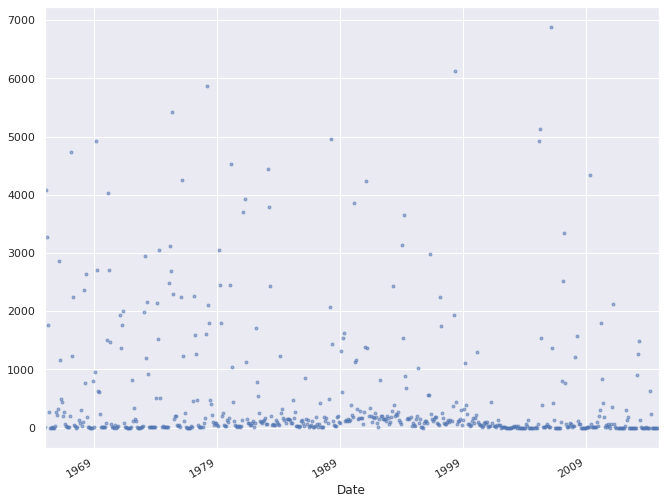

In [25]:
#xticks = pd.date_range(start="1980-01-01",end="2004-12-31", freq='Y')
#daily_discharge['Discharge'].plot(linewidth=1.0, ylim=(0,2.5), xticks=xticks);
daily_discharge.loc['1965-01':,'Discharge'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


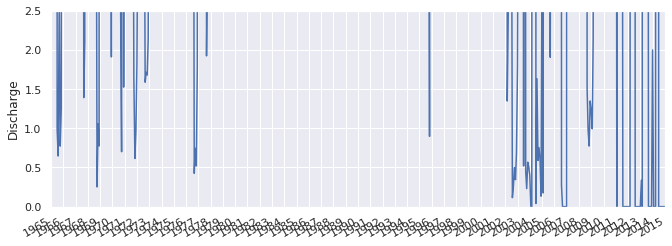

In [26]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(daily_discharge.loc['1965-01':'2014-12', 'Discharge'])
ax.set_ylabel('Discharge')
# Set x-axis major ticks to weekly interval, on Mondays
datemin = np.datetime64(daily_discharge.index[0], 'Y')
datemax = np.datetime64(daily_discharge.index[599], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)
ax.set_ylim(0, 2.5)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [27]:
daily_discharge['Year'] = daily_discharge.index.year
daily_discharge['Month'] = daily_discharge.index.month
daily_discharge.columns

Index(['Discharge', 'Year', 'Month'], dtype='object')

Text(0.5, 1, 'Discharge')

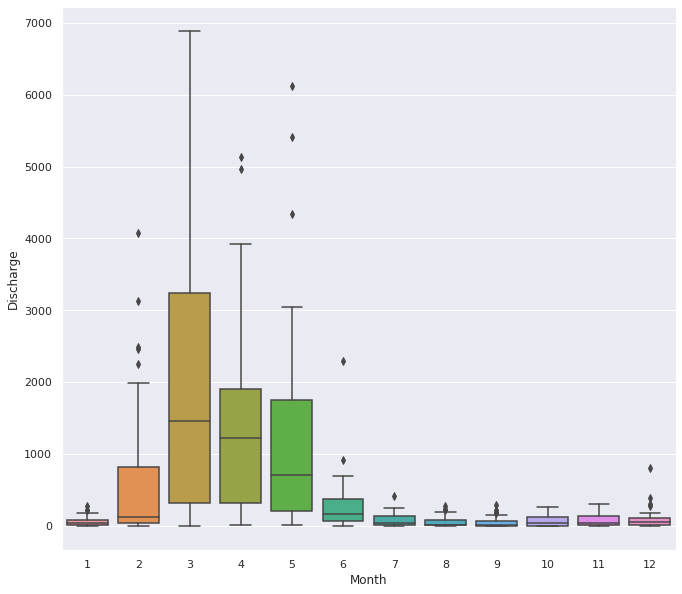

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=daily_discharge, x='Month', y='Discharge', ax=axes)
ax.set_title('Discharge')

In [29]:
###--- Use DataFrame's asfreq() to fill for the missing values---###
###---Check if any missing date/index---###
print(pd.date_range(start = '1980-06-03', end = '2004-07-15' ).difference(daily_discharge.index))

DatetimeIndex(['1980-06-03', '1980-06-04', '1980-06-05', '1980-06-06',
               '1980-06-07', '1980-06-08', '1980-06-09', '1980-06-10',
               '1980-06-11', '1980-06-12',
               ...
               '2004-07-06', '2004-07-07', '2004-07-08', '2004-07-09',
               '2004-07-10', '2004-07-11', '2004-07-12', '2004-07-13',
               '2004-07-14', '2004-07-15'],
              dtype='datetime64[ns]', length=8520, freq=None)


In [30]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Discharge']
# Resample to weekly frequency, aggregating with mean
discharge_weekly_mean = daily_discharge[data_columns].resample('W').mean()

discharge_monthly_mean = daily_discharge[data_columns].resample('M').mean()
discharge_monthly_mean.head(10)

,Discharge
Date,
1965-01-31,2.817102
1965-02-28,4075.688328
1965-03-31,3282.789179
1965-04-30,1768.535872
1965-05-31,266.902092
1965-06-30,0.987321
1965-07-31,0.646173
1965-08-31,2.560681
1965-09-30,0.772760


In [31]:
discharge_weekly_mean.shape

(2606, 1)

### Resampling

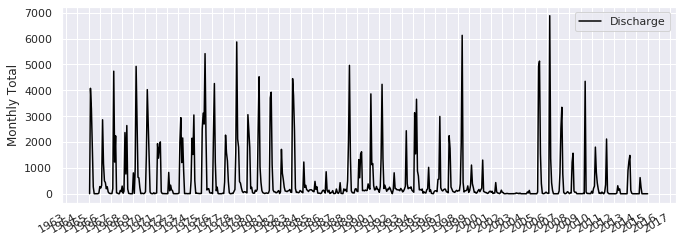

In [32]:
fig, ax = plt.subplots()
ax.plot(discharge_monthly_mean['Discharge'], color='black', label='Discharge')
#discharge_monthly['Discharge'].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_ylabel('Monthly Total');
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

### Rolling windows

**Weekly and yearly rolling window**

In [33]:
discharge_7d = daily_discharge[data_columns].rolling(7, center=True).mean()
discharge_30d = daily_discharge[data_columns].rolling('30D').mean()
discharge_365d = daily_discharge[data_columns].rolling(window=365, center=True, min_periods=360).mean()

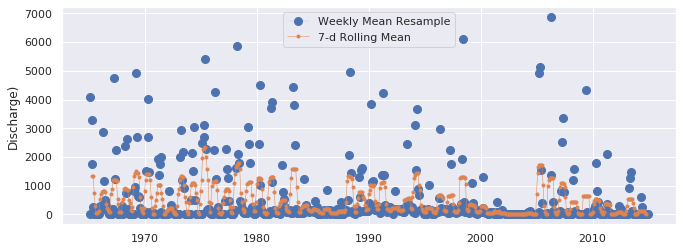

In [34]:
# Start and end of the date range to extract
start, end = '1965-01','2014-12'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
#ax.plot(daily_discharge.loc[start:end, 'Discharge'],
#marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(discharge_weekly_mean.loc[start:end, 'Discharge'],
marker='o', markersize=8, linestyle='-', linewidth=0.1, label='Weekly Mean Resample')
ax.plot(discharge_7d.loc[start:end, 'Discharge'],
marker='.', linestyle='-', linewidth=0.5, label='7-d Rolling Mean')
ax.set_ylabel('Discharge)')
ax.legend();

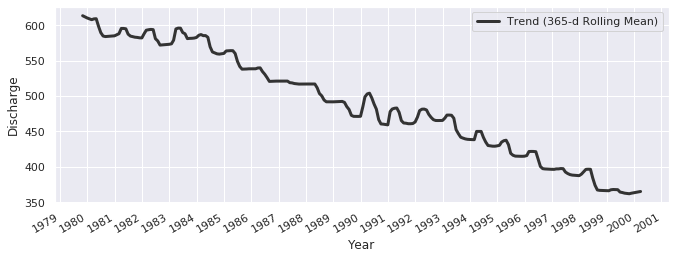

In [35]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(discharge_365d['Discharge'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

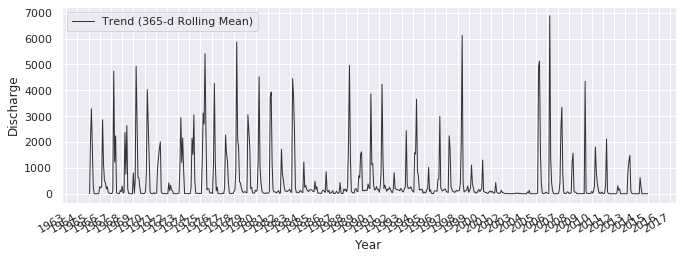

In [36]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(discharge_30d['Discharge'], color='0.2', linewidth=1,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [37]:
from scipy import stats
def calc_sri(X, time_scale, distribution, start_date=None, end_date=None):
    month_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    distr_dict = {'gamma': stats.gengamma, 
                  'gev': stats.genextreme,
                  'expo': stats.expon,
                  'lognorm' : stats.lognorm,
                  'weibull' : stats.dweibull,
                   'loglogistic': stats.fisk}
    
    if start_date!=None and end_date != None:
        X_scale = X.loc[start_date:end_date,'Discharge'].rolling(time_scale).mean()
    elif start_date!=None and end_date == None:
        X_scale = X.loc[start_date:,'Discharge'].rolling(time_scale).mean()
    elif start_date==None and end_date != None:
        X_scale = X.loc[:end_date,'Discharge'].rolling(time_scale).mean()
    else:
        X_scale = X['Discharge'].rolling(time_scale).mean()
    X_np = X_scale.to_numpy()
    
    df_shape = X_scale.shape
    X_np = X_np[~np.isnan(X_np)]
    res = 12 - X_np.shape[0]%12
    X_np = np.append(X_np,res*[0])
    X_np[X_np<=0] = np.finfo(float).eps
    X_np = np.reshape(X_np,(-1,12))

    sri = []
    loglikelihood = []
    for i in range(12):
        if i >= (12-res):
            x = X_np[:-1,i].reshape(-1,1)
        else:
            x = X_np[:,i].reshape(-1,1)

        if distribution=='gamma':
            a,c,loc,scale = distr_dict[distribution].fit(x)
            cdf_fitted = distr_dict[distribution].cdf(x, a, c)
            loglikelihood.append(distr_dict[distribution].logpdf(x, a, c).sum())
        elif distribution=='gev':
            a,loc,scale = distr_dict[distribution].fit(x)
            cdf_fitted = distr_dict[distribution].cdf(x,0.1646302302769883, 353.62667523704954,314.0396886094553)
            loglikelihood.append(distr_dict[distribution].logpdf(x, a).sum())
        elif distribution=='expo':
            loc,scale = distr_dict[distribution].fit(x)
            cdf_fitted = distr_dict[distribution].cdf(x, 1/scale)
            loglikelihood.append(distr_dict[distribution].logpdf(x, 1/scale).sum())
        elif distribution=='lognorm':
            scale_ = np.exp(np.log(x).mean())
            sigma_ = np.log(x).std()
            s,loc,scale = distr_dict[distribution].fit(x)
            cdf_fitted = distr_dict[distribution].cdf(x,s=s, scale=338.4953924960905,loc=490.3031736676365)
            loglikelihood.append(distr_dict[distribution].logpdf(x,s=sigma_,scale=338.4953924960905,loc=490.3031736676365).sum())
        elif distribution=='weibull':
            c,loc,scale = distr_dict[distribution].fit(x)
            cdf_fitted = distr_dict[distribution].cdf(x, c)
            loglikelihood.append(distr_dict[distribution].logpdf(x, c).sum())
        elif distribution=='loglogistic':
            c,loc,scale = distr_dict[distribution].fit(x)
            cdf_fitted = distr_dict[distribution].cdf(x, c)
            loglikelihood.append(distr_dict[distribution].logpdf(x, c).sum())
        cdf_fitted[cdf_fitted<=0.0] = np.finfo(float).eps
        cdf = stats.norm.ppf(cdf_fitted).flatten()
        sri.append(list(cdf))
    sri = list(chain.from_iterable(sri))
    for i in range(res):
        sri.insert(0, np.nan)
    
    return sri[:df_shape[0]], np.array(loglikelihood)

In [38]:
def calculate_aic(loglike, num_params):
    aic = -loglike + 2 * num_params
    return aic

In [39]:
discharge_monthly_sum = daily_discharge[['Discharge']]
#discharge_monthly_sum = (daily_discharge[['Discharge']] - daily_discharge[['Discharge']].min()) / (daily_discharge[['Discharge']].max() - daily_discharge[['Discharge']].min())
distr = ['gamma','gev','expo','lognorm','weibull', 'loglogistic']
num_params = [2,1,1,1,1,1]
aic_dict = {}
for d,n in zip(distr,num_params):
    sri_df_3months, logl = calc_sri(discharge_monthly_sum, time_scale=12, 
                                    distribution=d, start_date="1965-01")
    cumu_logl = np.mean(logl[np.isinf(logl)==False])
    aic_dict[d] = calculate_aic(cumu_logl, n)
print(aic_dict)

/home/akshay/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/akshay/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/akshay/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/home/akshay/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


{'gamma': 357642150.58666813, 'gev': 450.84461280900643, 'expo': 24192.930236089447, 'lognorm': nan, 'weibull': 3464963.5967330984, 'loglogistic': 1783.2981117551735}


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#discharge_monthly_sum = daily_discharge[['Discharge']].resample('M').sum()
#sri_np, logl = calc_sri(discharge_monthly_sum, time_scale=12, distribution='gev')
df_sri = pd.DataFrame(np.ravel(X2), columns=['SRI'])

NameError: name 'X2' is not defined

In [51]:
df_sri.head()

NameError: name 'df_sri' is not defined

In [ ]:
df_sri.shape

(132, 1)

In [ ]:
#frames=[df1,df_sri]
#df_sri=pd.concat(frames,axis=1)
#df_sri.set_index('Date')
#df_sri.columns = ['Date', 'Discharge']
df_sri['SRI'] = pd.to_numeric(df_sri['SRI'])
df_sri.dtypes

SRI    float64
dtype: object

In [ ]:
df_sri = df_sri.set_index(daily_discharge.index)
df_sri.head()
daily_discharge['SRI'] = df_sri['SRI']
#daily_discharge.head()

NameError: ignored

In [ ]:
#daily_discharge['SRI'] = df_sri['SRI']
daily_discharge.tail()

,Discharge,Year,Month,SRI
Date,,,,
2014-08-31,0.0,2014,8,-1.297519
2014-09-30,0.0,2014,9,-1.293553
2014-10-31,0.0,2014,10,-1.289747
2014-11-30,0.0,2014,11,-1.283776
2014-12-31,0.0,2014,12,-1.296637


In [ ]:
daily_discharge.to_csv('/content/drive/My Drive/Classification/final.csv',index=True)

"\nax2 = fig.add_subplot(212)\nax2.plot(spi[11])\n#prob = stats.probplot(xt, dist=stats.norm, plot=ax2)\nax2.set_title('Probplot after Box-Cox transformation')\n"

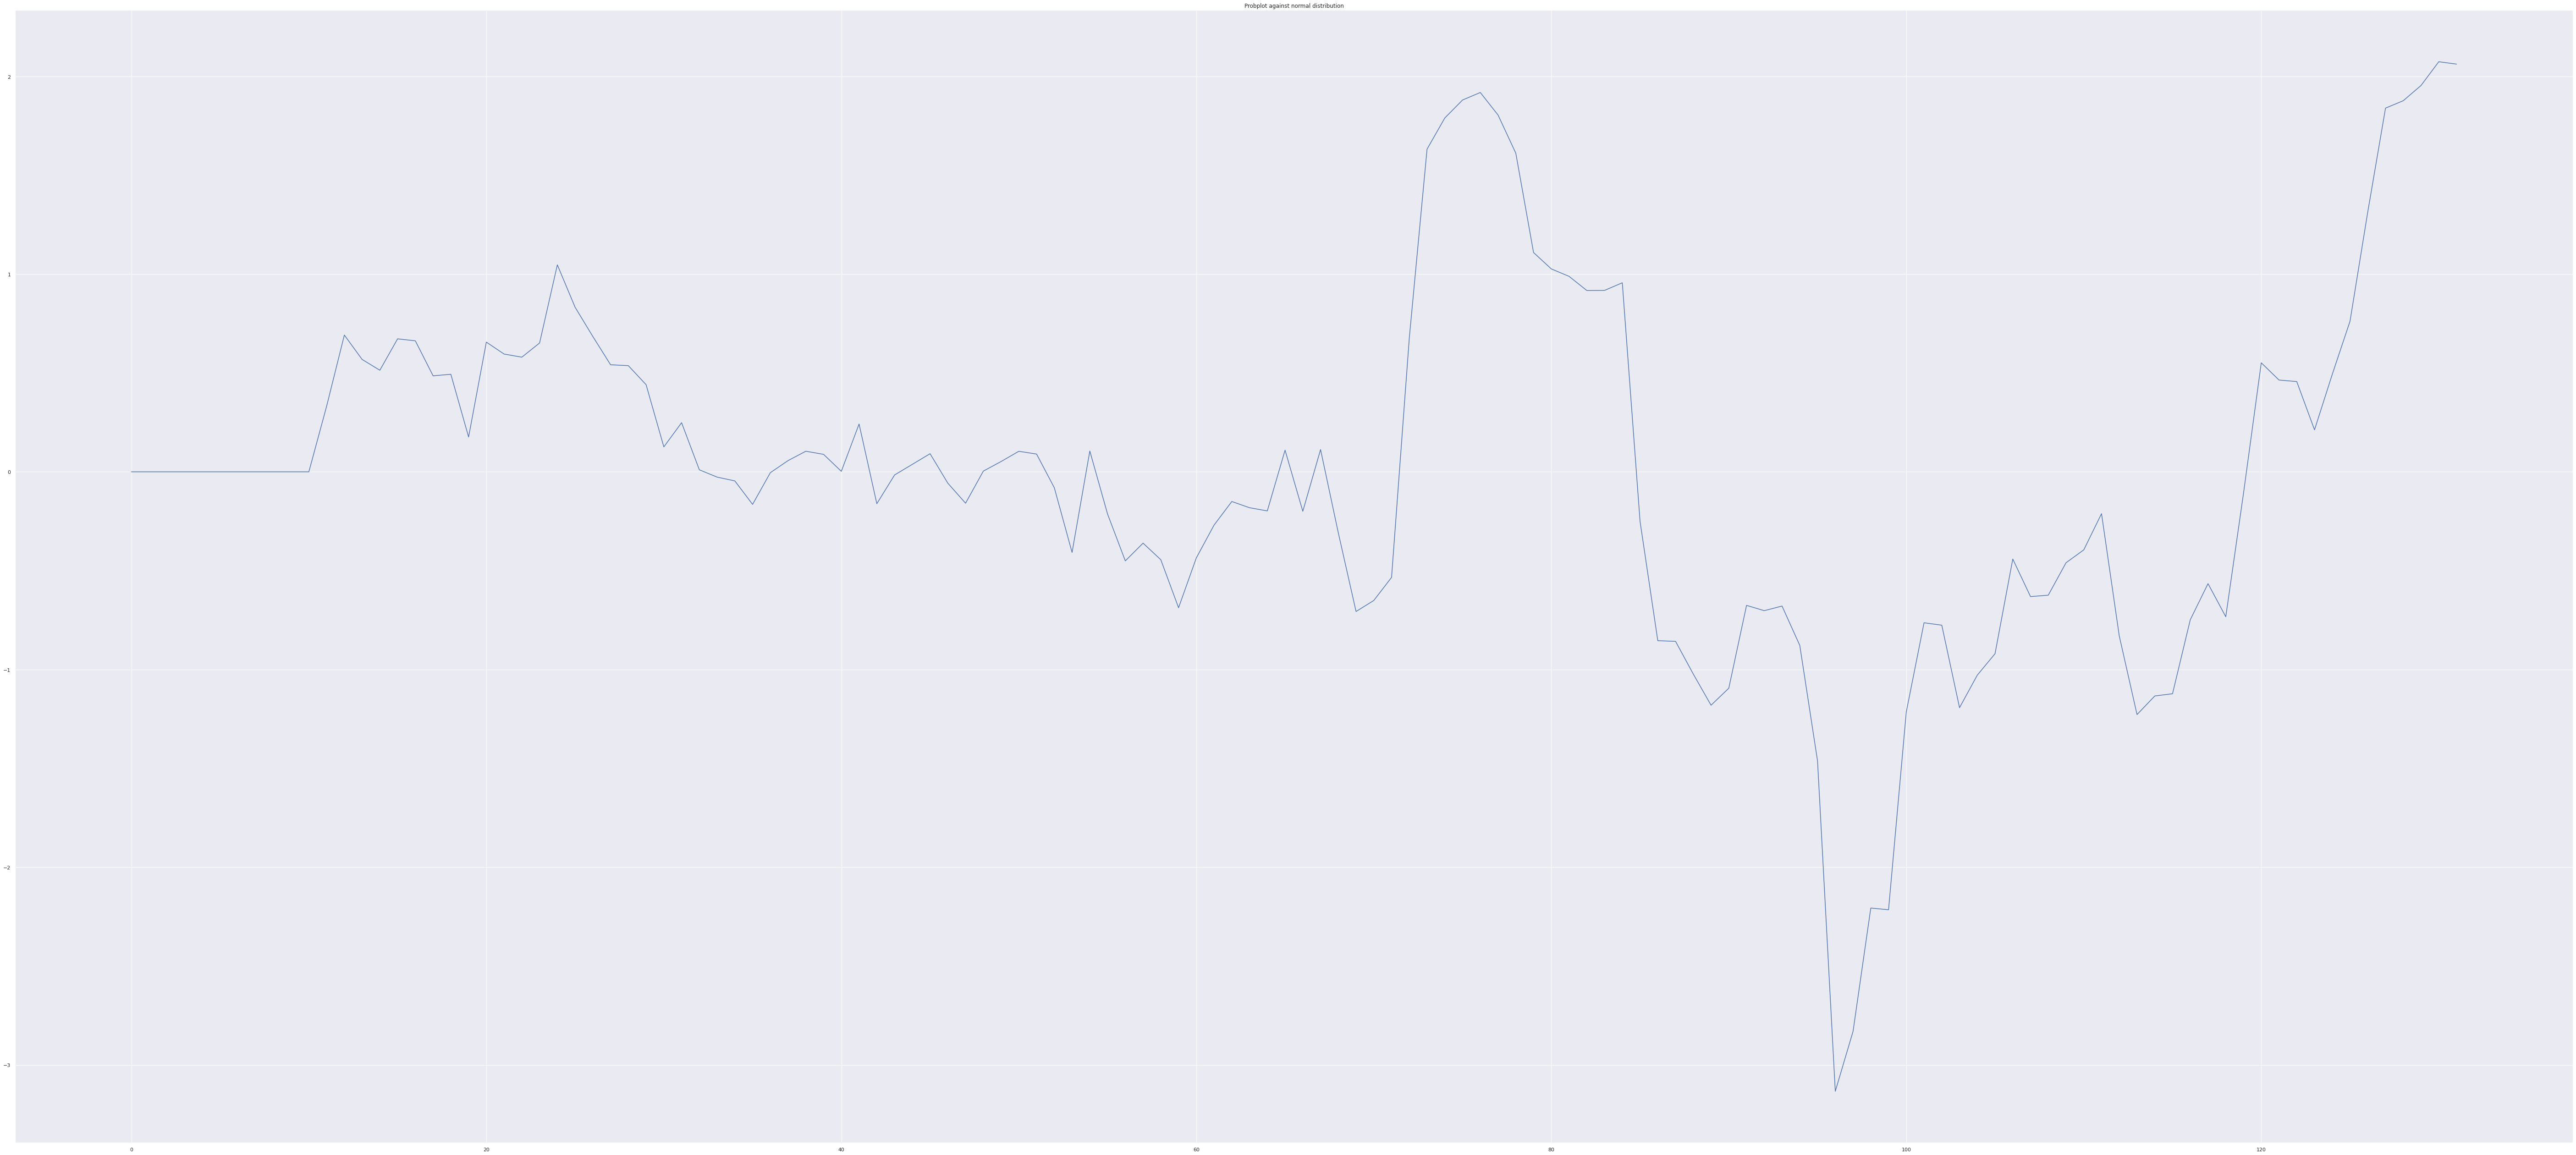

In [ ]:
fig = plt.figure(figsize=(100,100))
ax1 = fig.add_subplot(211)
ax1.plot(df_sri)
#prob = stats.probplot(pdf_fitted[0], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
'''
ax2 = fig.add_subplot(212)
ax2.plot(spi[11])
#prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
'''

In [ ]:
import geopandas as gpd

In [ ]:
discharge_loc = pd.read_csv("./data/KRB_Discharge_Stations/Discharge loctions Krishna Basin.csv")

In [ ]:
discharge_loc.head()

,Discharge location,latitude,longitude
0,Bawapuram,15.802,77.850
1,cholachguda,15.879,75.710
2,Halia,16.810,79.913
3,Hoovinahole,13.891,76.815
4,karad,17.276,74.200


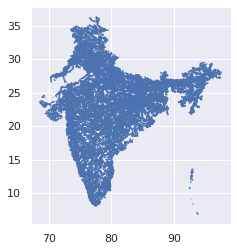

In [ ]:
'''
gdf = geopandas.GeoDataFrame(
    discharge_loc, geometry=geopandas.points_from_xy(discharge_loc.longitude, discharge_loc.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = country[world.country == 'Asia'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()
'''
fp = "./waterways/waterways.shp"
map_df = gpd.read_file(fp)

map_df.plot()

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats
import types

from lmoments3 import distr
from lmoments3 import stats



def create_month_cycle(n_months, start_month=1):
    '''
    Create a repeating array of months 1-12, truncated by start_month
    Example:
             Create an array of 24 months starting on March (3)
             create_month_cycle(24, start_month=3)
             array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
                     6,  7, 8,  9, 10, 11, 12,  1,  2])
    '''

    start = start_month - 1
    end = n_months + start_month - 1

    months = [(dt.datetime(2000, 1, 1) + relativedelta(months=i)).month
              for i in range(start, end)]

    return np.array(months)


class BaseStandardIndex(object):
    '''
    '''

    def __init__(self):
        self.span = None
        self.window_type = None
        self.params = None
        self.dist_type = None
        self.rw_kwargs = None
        self.dist_kwargs = None
        self.rw_center = None
        self.distrb = None
        self.t=None

    def set_rolling_window_params(self, span=1, window_type=None, center=True,
                                  **kwargs):
        '''
        span -- Size of the moving window. This is the number of observations
                used for calculating the statistic. Each window will be a fixed
                size.
        window_type -- includes 'boxcar', 'traing', 'blackman', etc
        rw_center -- If true calculated value is set to center of window, if
                     false it is the right edge of window
        kwargs -- Additional arguments. See pandas rolling documentation.
        '''

        self.span = span
        self.window_type = window_type
        self.rw_center = center
        self.rw_kwargs = kwargs

    def set_distribution_params(self, dist_type='norm', **kwargs):
        '''
        dist_type -- Distribution type to be fit (Gamma, fisk, etc)
        kwargs -- Addition arguments for fit and calculation of cdf and ppf.
                  These can include loc and scale. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous
        '''

        self.dist_type = dist_type
        self.dist_kwargs = kwargs

    def rolling_window_sum(self, data, span, window_type, center, **kwargs):
        '''
        pd.rolling_window is depreciated in pandas version 0.19
        '''

        data_df = pd.DataFrame(data)

        window_sum = np.squeeze(data_df.rolling(
            window=span, win_type=window_type, center=center, **kwargs
        ).sum().values.T)

        #weighted_sum = pd.rolling_window(
            #data, window=span, win_type=window_type, center=True,
            #mean=False, **kwargs
        #)

        return window_sum

    def rolling_window_mean(self, data, span, window_type, center, **kwargs):
        '''
        '''

        data_df = pd.DataFrame(data)

        window_mean = np.squeeze(data_df.rolling(
            window=span, win_type=window_type, min_periods=span,
            center=center, **kwargs
        ).mean().values.T)

        #weighted_mean = pd.rolling_window(
            #data, window=span, win_type=window_type, center=True,
            #mean=True, **kwargs
        #)

        return window_mean

    def fit_distribution(self, data, dist_type, **kwargs):
        '''
        Fit given distribution to historical precipitation data.
        The fit is accomplished using MLE or Maximum Likelihood Estimation.
        One should put some thought into the type of distribution fit to the
        data. Precipitation can have zero value and some distributions are only
        defined over interval (0, inf). Python's gamma distribution is defined
        over [0, inf). In addition SPEI which is constructed from precipitation
        - PET or (P-PET) can take on negative values!!
        Check https://docs.scipy.org/doc/scipy/reference/stats.html for
        distribution types
        dist_type -- distribution type to fit
        data      -- Historical data to fit
        kwargs    -- scale and location parameters. See documentation on
                     scipy.stats.rv_continuous.fit
        Returns: shape, location, and scale (tuple of floats)
        '''

        # Get distribution type
        try:
            self.distrb = getattr(distr, dist_type)
        except AttributeError:
            print("{} is not a valid distribution type".format(dist_type))

        # Fit distribution
        params = self.distrb.lmom_fit(data, **kwargs)
        
        

        return params

    def data_generator(self, read_func, file_list, *args):
        '''
        Generator to read data. Use the Generator function if you have a
        significant amount of data that can not be read into memory at once.
        read_func  -- user generated function to read data
        file_list  -- list of filenames to read with read_func
        *args      -- any arguments necessary for user defined read function
        '''

        for fname in file_list:
            yield read_func(fname, *args)

    def calculate(self, data, starting_month=1):
        '''
        First dimension of data should be time (months)
        '''

        # Check if distribution has been fit on historical data
        if self.dist_type is None:
            print ("You must fit a distribution first")
            return False

        if isinstance(data, types.GeneratorType):
            pass

        else:
            spi,score,par = self.calculate_over_full_series(data, starting_month)
            

        return spi,score,par;

    def calculate_over_full_series(self, data, starting_month):

        # Number of months in data
        n_months = np.shape(data)[0]

        # Create month list
        mnth_list = create_month_cycle(n_months, start_month=starting_month)

        # Pre-allocate SPI
        spi = np.zeros(np.shape(data))*np.nan

        # Single date series
        if data.ndim == 1:
            data = data.reshape(len(data), 1)
            spi = spi.reshape(len(spi), 1)

        # Loop over other series (non-time)
        for i in range(np.shape(data)[1]):
            data_one_series = np.copy(data[:, i])

            # Apply rolling window
            if self.window_type:
                data_one_series = self.rolling_window_mean(
                    data_one_series, self.span, self.window_type,
                    self.rw_center, **self.rw_kwargs
                )

            # Loop over months
            for j in range(1, 13):
                mnth_inds = np.where(mnth_list == j)[0]

                if len(mnth_inds) == 0:
                    continue

                data_month = data_one_series[mnth_inds]

                # Find all nans in data and remove for fitting distribution
                nan_inds = np.where(np.isnan(data_month))[0]
                data_month = data_month[~np.isnan(data_month)]
                data_month_sorted = np.sort(data_month)[::-1]
                mnth_inds = np.delete(mnth_inds, nan_inds)

                # Fit distribution for particular series and month
                params = self.fit_distribution(
                    data_month_sorted, self.dist_type, **self.dist_kwargs
                )
                
                score  = stats.AIC(data, self.dist_type, params)

                # Calculate SPI/SPEI
                spi[mnth_inds, i] = self.cdf_to_ppf(data_month, params)

        return spi,score,params;

    def cdf_to_ppf(self, data, params):
        '''
        Take the specific distributions fitted parameters and calculate the
        cdf. Apply the inverse normal distribution to the cdf to get the SPI
        SPEI. This process is best described in Lloyd-Hughes and Saunders, 2002
        which is included in the documentation.
        '''

        # Calculate the CDF of observed precipitation on a given time scale
        cdf = self.distrb.cdf(data, **params)

        # Apply inverse normal distribution
        norm_ppf = distr.nor.ppf(cdf)

        return norm_ppf

    def best_fit_distribution(self, data, dist_list, bins=10, save_file=None):
        '''
        Calculates the Sum of the Squares error between fitted distribution and
        pdf.
        Inspired by: http://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
        '''

        y, x = np.histogram(data, bins=bins, normed=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0

        sse = {}

        fig, ax = plt.subplots()
        ax.bar(x, y, width=0.5, align='center', color='b', alpha=0.5, label='data')

        for i, dist_name in enumerate(dist_list):
            dist = getattr(distr, dist_name)

            params = dist.lmom_fit(data)

            pdf = dist.pdf(x, **params)

            sse[dist_name] = np.sum((y - pdf)**2)

            ax.plot(x, pdf, label=dist_name)

        ax.legend()
        ax.grid(True)

        if save_file:
            plt.savefig(save_file, dpi=400)
        else:
            plt.show()

        return sse

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def plot_index(time, data, save_file=None, index_type='SPI'):

    b_width = 22
    pos_inds = np.where(data >= 0.)[0]
    neg_inds = np.where(data < 0.)[0]

    data = np.squeeze(data)

    fig, ax = plt.subplots()
    ax.bar(time[pos_inds], data[pos_inds], width=b_width, align='center', color='b')
    ax.bar(time[neg_inds], data[neg_inds], width=b_width, align='center', color='r')
    ax.grid(True)
    ax.set_xlabel("Date")
    ax.set_ylabel(index_type)

    if save_file:
        plt.savefig(save_file, dpi=400)
    else:
        plt.show()


In [21]:
 


class SPI(BaseStandardIndex):

    def set_distribution_params(self, dist_type='gam', **kwargs):
        super(SPI, self).set_distribution_params(dist_type=dist_type, **kwargs)

In [22]:
#rainfall_data1 = np.genfromtxt('/dt.csv', delimiter=',')


In [23]:
df1=final["Prec"].values

In [24]:
df1=pd.DataFrame(df1)

In [25]:
rainfall_data=np.array(df1)

In [26]:
df1.head()

,0
0,0.0
1,0.0
2,0.0
3,2.6
4,19.2


In [27]:
df1.columns = ['P']

In [28]:
X_scale = df1['P'].rolling(12).mean()
X_np = X_scale.to_numpy()
    
    
df_shape = X_scale.shape
X_np = X_np[~np.isnan(X_np)]

In [29]:
print(X_np.shape)


(121,)


In [51]:
print(type(X_np))

<class 'numpy.ndarray'>


In [30]:
print(data.shape)
print(data[588])

(600,)
0.0


In [31]:

spi = SPI()



In [69]:
!pip install scipy==1.1.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 31.2 MB 89 kB/s eta 0:00:011
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

mlxtend 0.17.3 requires scipy>=1.2.1, but you'll have scipy 1.1.0 which is incompatible.
evo 1.12.0 requires scipy>=1.2, but you'll have scipy 1.1.0 which is incompatible.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [54]:
spi.set_rolling_window_params(
    span=1, window_type=None, center=True
)

# Set distribution parameters
spi.set_distribution_params(dist_type='gam')

# Calculate SPI
data,score,par = spi.calculate(X_np, starting_month=1)

In [55]:
print(score)

[1123.20813085]


In [56]:
print(par)

OrderedDict([('a', 4.762229431203515), ('loc', 0), ('scale', 14.123112078412111)])


In [57]:
X2=data.flatten()

In [58]:
for i in range(11):

 X2=np.concatenate([[0],X2])


print(X2.shape)

(132,)


In [59]:
def create_datelist(start_date, n_months):

    dates = [start_date + relativedelta(months=i) for i in range(0, n_months)]

    return np.array(dates) 


In [60]:
n_dates = np.shape(data)[0]
date_list = create_datelist(dt.date(1980, 1, 1), 121)

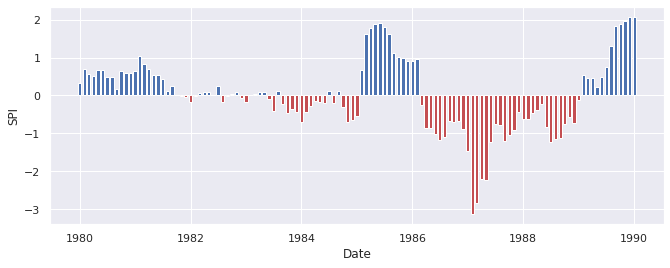

[ 3.31491403e-01  6.91809352e-01  5.68550870e-01  5.13807374e-01
  6.72751132e-01  6.62580476e-01  4.85569162e-01  4.93431914e-01
  1.76226998e-01  6.56103040e-01  5.95703713e-01  5.79952145e-01
  6.51752316e-01  1.04703528e+00  8.32457066e-01  6.84449987e-01
  5.41492904e-01  5.37023621e-01  4.40829559e-01  1.26123605e-01
  2.48576093e-01  1.02539171e-02 -2.66153242e-02 -4.58954405e-02
 -1.64659289e-01 -4.29690828e-03  5.69166381e-02  1.04227779e-01
  8.83956591e-02  2.49326074e-03  2.41902385e-01 -1.61196449e-01
 -1.59216255e-02  3.77581328e-02  9.17288716e-02 -5.73637066e-02
 -1.58690312e-01  3.63509318e-03  5.21288055e-02  1.03944964e-01
  8.98854418e-02 -8.05401427e-02 -4.07704734e-01  1.05432636e-01
 -2.13617169e-01 -4.50378708e-01 -3.60682906e-01 -4.44624811e-01
 -6.87382597e-01 -4.35401542e-01 -2.69294597e-01 -1.50100500e-01
 -1.81568226e-01 -1.97615285e-01  1.09687079e-01 -1.99661355e-01
  1.12752939e-01 -3.08609520e-01 -7.06422754e-01 -6.50558619e-01
 -5.33971604e-01  6.77749

In [61]:
plot_index(date_list, data)
print(np.squeeze(data))

In [62]:
dist_list = ['gam', 'gev', 'glo', 'gno', 'wei']


/usr/lib/python3/dist-packages/ipykernel_launcher.py:252: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:265: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.


distribution = gam; SSE = 0.025831550354336968
distribution = gev; SSE = 0.025398847519581415
distribution = glo; SSE = 0.025929202412027775
distribution = gno; SSE = 0.025069791656759252
distribution = wei; SSE = 0.024886219885268124


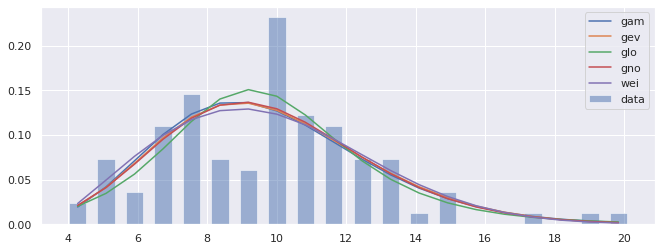

In [63]:
test_data = scipy.stats.gamma.rvs(10., size=100)
sse = spi.best_fit_distribution(test_data, dist_list, bins=20, save_file='test.jpg')

for k in sse:
    print("distribution = {0:}; SSE = {1:}".format(k, sse[k]))

[8469.25386528]
(600,)


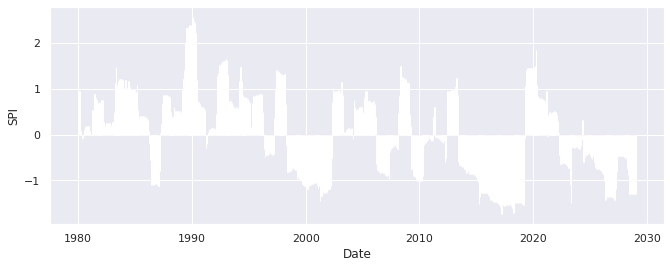

[ 9.21193427e-01  9.49438835e-01  1.10063404e-01  7.69634281e-02
 -1.01012653e-01 -7.40909075e-02  4.97349822e-02  9.93044251e-02
  1.65830448e-01  1.82520207e-01  1.86196701e-01  1.81990677e-01
  8.14248978e-02 -6.23862028e-03 -1.54651807e-03  5.31784171e-01
  4.95858500e-01  8.84273205e-01  7.96614459e-01  7.58976491e-01
  6.99338948e-01  6.82835182e-01  7.03887255e-01  7.17660423e-01
  7.57050635e-01  7.34115945e-01  7.58570019e-01  2.70693878e-01
  1.21062142e-01  1.91408598e-01  2.40544213e-01  2.40487784e-01
  2.43105148e-01  2.42560434e-01  2.11462889e-01  1.92801200e-01
  2.78206795e-01  2.43668450e-01  4.89892198e-01  1.11368953e+00
  1.45848674e+00  1.07241149e+00  1.15902830e+00  1.20199143e+00
  1.19938783e+00  1.19808691e+00  1.19955685e+00  1.19534666e+00
  1.01445800e+00  1.00921781e+00  1.17803873e+00  1.01980281e+00
  9.65423402e-01  1.16663100e+00  1.03769826e+00  9.88282489e-01
  9.86209251e-01  9.82183984e-01  9.84846119e-01  9.81421673e-01
  9.65721066e-01  9.34069

In [70]:
df_discharge=df["Discharge"].values
df_discharge=pd.DataFrame(df_discharge)
disharge_data=np.array(df_discharge)
df_discharge.head()
df_discharge.columns = ['Dis']

X_scale_dis = df_discharge['Dis'].rolling(12).mean()
X_np_dis = X_scale_dis.to_numpy()
    
    
df_shape = X_scale_dis.shape
X_np_dis = X_np_dis[~np.isnan(X_np_dis)]

sri = SPI()

sri.set_rolling_window_params(
    span=1, window_type=None, center=True
)

# Set distribution parameters
sri.set_distribution_params(dist_type='gev')

# Calculate SPI
data_dis,score_dis,par_dis = sri.calculate(X_np_dis, starting_month=1)

print(score_dis)

X2_dis=data_dis.flatten()

for i in range(11):

    X2_dis=np.concatenate([[0],X2_dis])


print(X2_dis.shape)

n_dates = np.shape(data_dis)[0]
date_list = create_datelist(dt.date(1980, 1, 1), 600)

plot_index(date_list, data_dis)
print(np.squeeze(data_dis))